<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/bagging_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('iris.data.csv')
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv('iris.data.csv', names=column_names, header=None)

In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder=LabelEncoder()

In [6]:
df['species']=encoder.fit_transform(df['species'])

In [7]:
df = df[df['species'] != 0][['petal_length','sepal_width','species']]

In [8]:
df

,petal_length,sepal_width,species
50,4.7,3.2,1
51,4.5,3.2,1
52,4.9,3.1,1
53,4.0,2.3,1
54,4.6,2.8,1
...,...,...,...
145,5.2,3.0,2
146,5.0,2.5,2
147,5.2,3.0,2
148,5.4,3.4,2


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

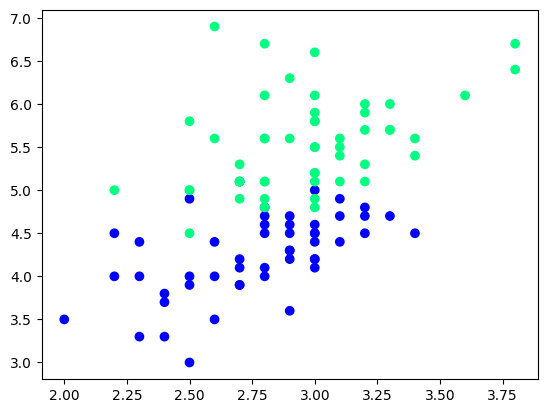

In [10]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [11]:
df = df.sample(100,replace=True)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)


In [12]:
df.shape

(100, 3)

In [13]:
df_train

,petal_length,sepal_width,species
118,6.9,2.6,2
77,5.0,3.0,1
112,5.5,3.0,2
76,4.8,2.8,1
112,5.5,3.0,2
144,5.7,3.3,2
142,5.1,2.7,2
65,4.4,3.1,1
68,4.5,2.2,1
133,5.1,2.8,2


In [14]:
df_val

,petal_length,sepal_width,species
76,4.8,2.8,1
80,3.8,2.4,1
143,5.9,3.2,2
62,4.0,2.2,1
86,4.7,3.1,1


In [15]:
x_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [16]:
# baggoing
# data for tree

df_bag=df_train.sample(8,replace=True)

x=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,petal_length,sepal_width,species
112,5.5,3.0,2
144,5.7,3.3,2
144,5.7,3.3,2
144,5.7,3.3,2
65,4.4,3.1,1
133,5.1,2.8,2
65,4.4,3.1,1
112,5.5,3.0,2


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [18]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

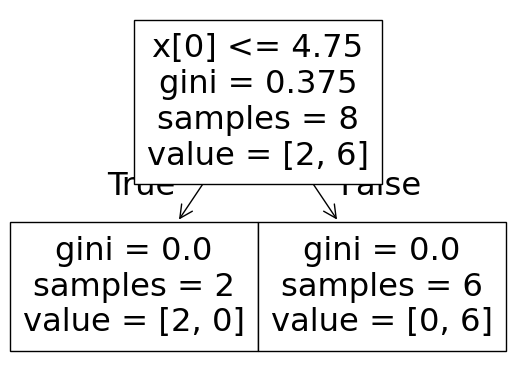

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


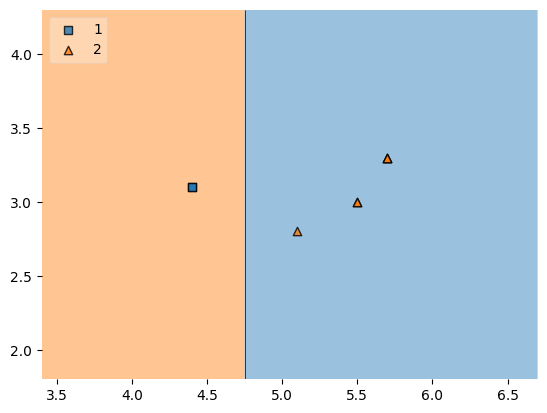

In [19]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,x,y)

In [20]:
# data for tree 1
df_bag=df_train.sample(8,replace=True)

# fetch x and y
x=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

# print df_bag
df_bag

,petal_length,sepal_width,species
142,5.1,2.7,2
144,5.7,3.3,2
68,4.5,2.2,1
112,5.5,3.0,2
144,5.7,3.3,2
77,5.0,3.0,1
142,5.1,2.7,2
65,4.4,3.1,1


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [22]:
dt_bag1 = DecisionTreeClassifier()

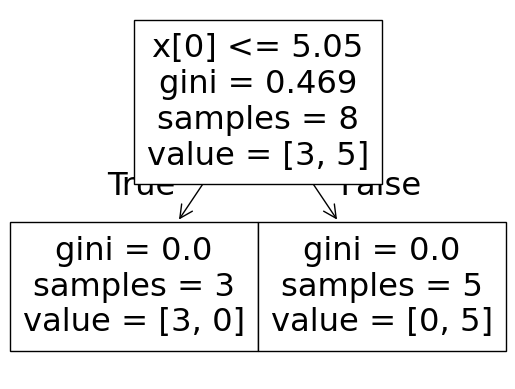

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


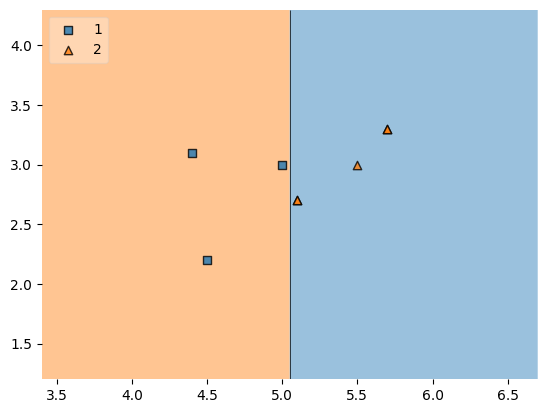

In [23]:
evaluate(dt_bag1,x,y)

In [24]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,petal_length,sepal_width,species
142,5.1,2.7,2
68,4.5,2.2,1
68,4.5,2.2,1
144,5.7,3.3,2
112,5.5,3.0,2
118,6.9,2.6,2
142,5.1,2.7,2
112,5.5,3.0,2


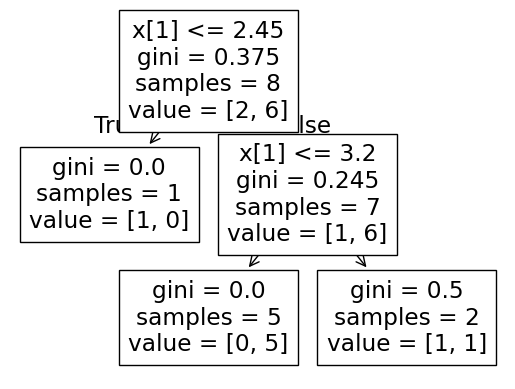

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


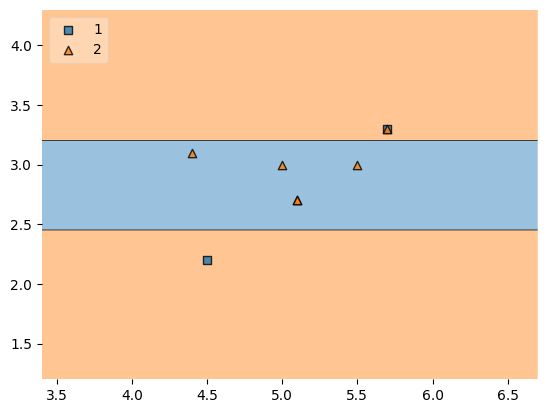

In [25]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,x,y)

In [26]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,petal_length,sepal_width,species
144,5.7,3.3,2
144,5.7,3.3,2
112,5.5,3.0,2
133,5.1,2.8,2
112,5.5,3.0,2
142,5.1,2.7,2
76,4.8,2.8,1
133,5.1,2.8,2


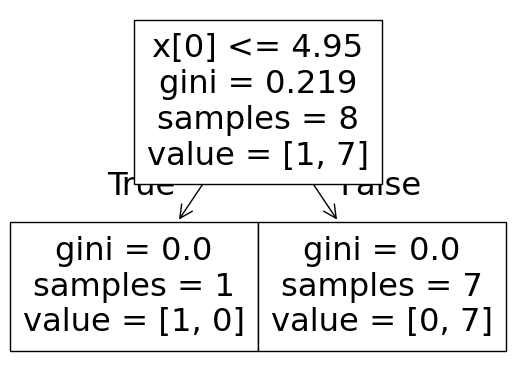

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


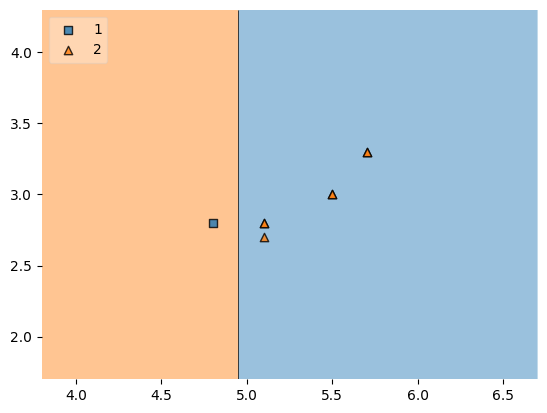

In [27]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [29]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

In [32]:
 df_test

,petal_length,sepal_width,species
72,4.9,2.5,1
102,5.9,3.0,2
56,4.7,3.3,1
81,3.7,2.4,1
102,5.9,3.0,2


In [33]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## pasting

In [34]:
# Row sampling without replacement
df_train

,petal_length,sepal_width,species
118,6.9,2.6,2
77,5.0,3.0,1
112,5.5,3.0,2
76,4.8,2.8,1
112,5.5,3.0,2
144,5.7,3.3,2
142,5.1,2.7,2
65,4.4,3.1,1
68,4.5,2.2,1
133,5.1,2.8,2


In [35]:
df_train.sample(8)

,petal_length,sepal_width,species
112,5.5,3.0,2
65,4.4,3.1,1
144,5.7,3.3,2
77,5.0,3.0,1
133,5.1,2.8,2
68,4.5,2.2,1
118,6.9,2.6,2
76,4.8,2.8,1


## Random Subspaces

In [36]:
df1 = pd.read_csv('iris.data.csv')
df1 = df1.sample(10)

In [37]:
df1

,5.1,3.5,1.4,0.2,Iris-setosa
134,7.7,3.0,6.1,2.3,Iris-virginica
32,5.5,4.2,1.4,0.2,Iris-setosa
122,6.3,2.7,4.9,1.8,Iris-virginica
54,5.7,2.8,4.5,1.3,Iris-versicolor
31,5.2,4.1,1.5,0.1,Iris-setosa
23,4.8,3.4,1.9,0.2,Iris-setosa
53,6.5,2.8,4.6,1.5,Iris-versicolor
26,5.2,3.5,1.5,0.2,Iris-setosa
45,5.1,3.8,1.6,0.2,Iris-setosa
65,5.6,3.0,4.5,1.5,Iris-versicolor


In [38]:
df1.sample(2,replace=True,axis=1)

,3.5,Iris-setosa
134,3.0,Iris-virginica
32,4.2,Iris-setosa
122,2.7,Iris-virginica
54,2.8,Iris-versicolor
31,4.1,Iris-setosa
23,3.4,Iris-setosa
53,2.8,Iris-versicolor
26,3.5,Iris-setosa
45,3.8,Iris-setosa
65,3.0,Iris-versicolor


## Random patches

In [39]:
df1

,5.1,3.5,1.4,0.2,Iris-setosa
134,7.7,3.0,6.1,2.3,Iris-virginica
32,5.5,4.2,1.4,0.2,Iris-setosa
122,6.3,2.7,4.9,1.8,Iris-virginica
54,5.7,2.8,4.5,1.3,Iris-versicolor
31,5.2,4.1,1.5,0.1,Iris-setosa
23,4.8,3.4,1.9,0.2,Iris-setosa
53,6.5,2.8,4.6,1.5,Iris-versicolor
26,5.2,3.5,1.5,0.2,Iris-setosa
45,5.1,3.8,1.6,0.2,Iris-setosa
65,5.6,3.0,4.5,1.5,Iris-versicolor


In [40]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,0.2,Iris-setosa
54,1.3,Iris-versicolor
122,1.8,Iris-virginica
65,1.5,Iris-versicolor
31,0.1,Iris-setosa
32,0.2,Iris-setosa
54,1.3,Iris-versicolor
26,0.2,Iris-setosa
26,0.2,Iris-setosa
